In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# Display max_column
pd.set_option('display.max_columns', 60)

In [7]:
# load data
train = pd.read_csv('C:\\Users\\Harshita\\Desktop\\Data Science\\data.csv')

In [8]:
# First 5 row of trainning dataset
train.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,1437,0,0,0.000,1403,squad-fpp,31,29,-1,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,1225,0,0,0.000,1971,squad-fpp,30,30,-1,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,0,0,0,0.000,1741,solo-fpp,96,89,1516,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,1286,0,0,0.000,1738,squad-fpp,28,27,-1,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,0,1,1,7.737,2193,solo,99,95,1482,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [9]:
# shape of trainning data
train.shape

(1111742, 30)

In [10]:
# null value of dataset
train.isna().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

Data fields

DBNOs - Number of enemy players knocked.
assists - Number of enemy players this player damaged that were killed by teammates.
boosts - Number of boost items used.
damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
headshotKills - Number of enemy players killed with headshots.
heals - Number of healing items used.
Id - Player’s Id
killPlace - Ranking in match of number of enemy players killed.
killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
killStreaks - Max number of enemy players killed in a short amount of time.
kills - Number of enemy players killed.
longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
matchDuration - Duration of match in seconds.
matchId - ID to identify match. There are no matches that are in both the training and testing set.
matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
revives - Number of times this player revived teammates.
rideDistance - Total distance traveled in vehicles measured in meters.
roadKills - Number of kills while in a vehicle.
swimDistance - Total distance traveled by swimming measured in meters.
teamKills - Number of times this player killed a teammate.
vehicleDestroys - Number of vehicles destroyed.
walkDistance - Total distance traveled on foot measured in meters.
weaponsAcquired - Number of weapons picked up.
winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
numGroups - Number of groups we have data for in the match.
maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

# EDA - Exploratory Data Analysis


Text(0.5, 1.0, 'Frequecy of different types of match')

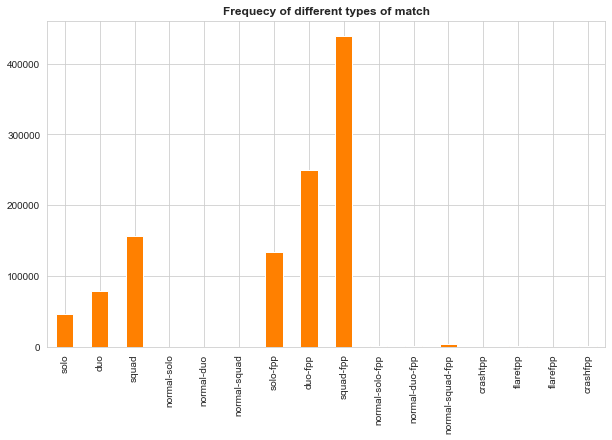

In [11]:
# Frequecy of different types of match
matchTypes = ["solo", "duo", "squad", "normal-solo", "normal-duo", "normal-squad", "solo-fpp", "duo-fpp", "squad-fpp", "normal-solo-fpp", "normal-duo-fpp", "normal-squad-fpp", "crashtpp", "flaretpp", "flarefpp", "crashfpp"]
train["matchType"].value_counts()[matchTypes].plot(kind="bar", figsize=(10,6), color="#ff8000")
plt.title("Frequecy of different types of match", fontweight="bold")

Text(0.5, 1.0, 'Kill Counts')

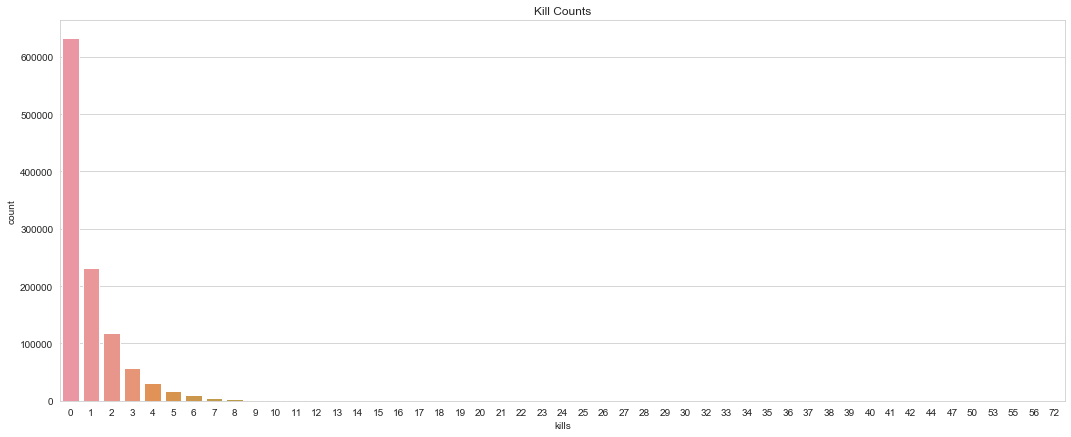

In [12]:
# Frequency of Kill Counts
plt.subplots(figsize=(18,7))
sns.countplot(train['kills']).set_title("Kill Counts")

In [13]:
# Useful information of dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
Unnamed: 0         1111742 non-null int64
Id                 1111742 non-null object
groupId            1111742 non-null object
matchId            1111742 non-null object
assists            1111742 non-null int64
boosts             1111742 non-null int64
damageDealt        1111742 non-null float64
DBNOs              1111742 non-null int64
headshotKills      1111742 non-null int64
heals              1111742 non-null int64
killPlace          1111742 non-null int64
killPoints         1111742 non-null int64
kills              1111742 non-null int64
killStreaks        1111742 non-null int64
longestKill        1111742 non-null float64
matchDuration      1111742 non-null int64
matchType          1111742 non-null object
maxPlace           1111742 non-null int64
numGroups          1111742 non-null int64
rankPoints         1111742 non-null int64
revives            1111742 non-null int

In [14]:
# Useful information of dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
Unnamed: 0         1111742 non-null int64
Id                 1111742 non-null object
groupId            1111742 non-null object
matchId            1111742 non-null object
assists            1111742 non-null int64
boosts             1111742 non-null int64
damageDealt        1111742 non-null float64
DBNOs              1111742 non-null int64
headshotKills      1111742 non-null int64
heals              1111742 non-null int64
killPlace          1111742 non-null int64
killPoints         1111742 non-null int64
kills              1111742 non-null int64
killStreaks        1111742 non-null int64
longestKill        1111742 non-null float64
matchDuration      1111742 non-null int64
matchType          1111742 non-null object
maxPlace           1111742 non-null int64
numGroups          1111742 non-null int64
rankPoints         1111742 non-null int64
revives            1111742 non-null int

Text(0.5, 1.0, 'Head Shot Kills Count')

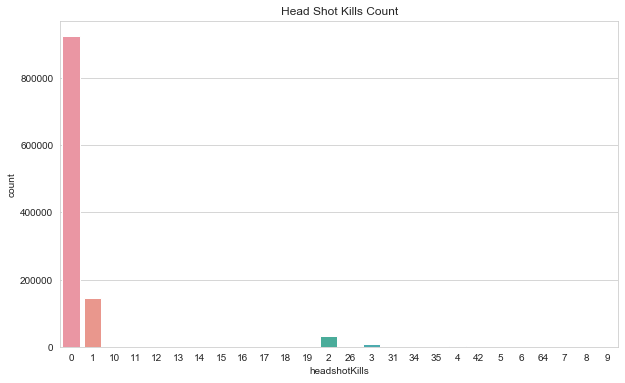

In [15]:
# Total Headshot Kill Count
plt.subplots(figsize=(10,6))
sns.countplot(x=train["headshotKills"].astype('str').sort_values(), data=train).set_title("Head Shot Kills Count")

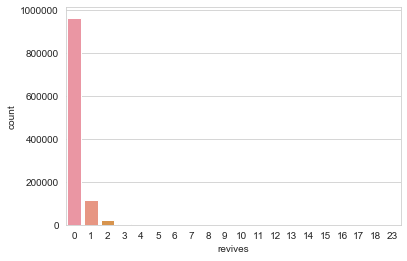

In [16]:
# Revives frequency
sns.countplot(x=train["revives"])

In [17]:
# Longest Survival Duration
train["damageDealt"].max()

5990.0

In [18]:
# win without damage
without_damage = train[train["damageDealt"]==0]
winning = len(without_damage[without_damage["winPlacePerc"]==1])
# longest ply duration
duration = len(train[train["matchDuration"]==2237])
# win without single kill
without_kill = train[train["kills"]==0]
without_kill_count = len(without_kill[without_kill["winPlacePerc"]==1])


In [19]:
print(f"{winning} player win without dealing with damage")

print(f"{duration} player plays longest survival match")

print(f"{without_kill_count} player win without single kill")

1199 player win without dealing with damage
21 player plays longest survival match
4197 player win without single kill


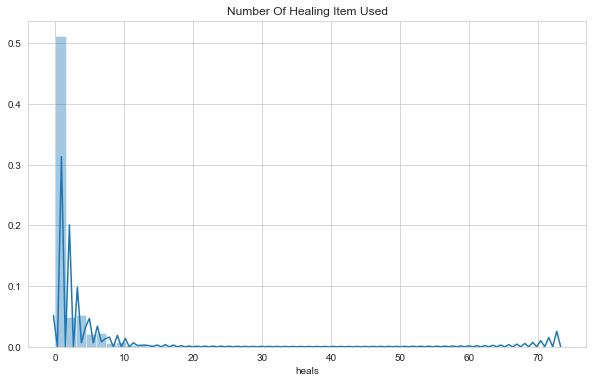

In [20]:
# Healing item use
plt.subplots(figsize=(10, 6))
plt.title("Number Of Healing Item Used")
sns.distplot(train["heals"])

In [21]:
# Player group... In solo no group, in duo minimum 50 group and in squad (25 * 4) minimum 25 group
solo_game = train[train["numGroups"] > 50]
solo = len(solo_game)

duo_game = train[(train["numGroups"] > 25) & (train["numGroups"] <= 50)]
duo = len(duo_game)

squad_game = train[train["numGroups"] <= 25]
squad = len(squad_game)

In [22]:
print(f"{solo} solo game player\n {duo} player in duo\n and {squad} player in squad")

177161 solo game player
 824015 player in duo
 and 110566 player in squad


In [23]:
solo_game

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,0,0,0,0.000,1741,solo-fpp,96,89,1516,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,0,1,1,7.737,2193,solo,99,95,1482,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429
5,2862125,e705cb7a4446ea,9d7180a567d020,b146588581df18,0,0,0.00,0,0,0,59,0,0,0,0.000,1358,solo-fpp,94,90,1503,0,0.0,0,0.0,0,0,446.00,3,0,0.4946
6,365937,e253262031e08f,e5df2dcdaf3f4b,c1385ae84655e6,0,0,0.00,0,0,0,81,0,0,0,0.000,1497,solo-fpp,99,98,1464,0,0.0,0,0.0,0,0,45.86,1,0,0.1939
7,3651102,c264a5ce0d4ca1,0efbbf391d7f62,b280791eb7a3fd,0,8,170.20,0,0,1,25,0,1,1,32.960,1968,solo-fpp,97,94,1544,0,0.0,0,221.0,0,0,3297.00,5,0,0.9688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111702,4304073,616af81139f010,5fc90329091b63,bbab279d6b8189,0,0,147.30,0,0,0,42,1157,1,1,9.323,1967,solo-fpp,95,94,-1,0,0.0,0,0.0,0,0,183.20,1,1484,0.0745
1111710,2395480,cec608775bf006,e4d8f7af5dccbb,e0248a01c8be33,0,1,218.40,0,0,0,20,0,2,1,27.820,1442,solo-fpp,91,88,1534,0,0.0,0,0.0,0,0,116.70,2,0,0.5000
1111715,4298326,729efc24aab8f4,2d64d3e37a7d14,ad77c274378efb,0,1,225.90,0,0,1,21,0,2,1,13.720,1394,solo-fpp,95,92,1696,0,0.0,0,0.0,0,0,532.20,3,0,0.5745
1111736,4412080,a87134976177e4,b22d88e51a064b,175b0cabe633c0,0,0,0.00,0,0,0,87,0,0,0,0.000,1515,solo,95,94,1507,0,0.0,0,0.0,0,0,31.01,2,0,0.0851


Text(14, 0.67, 'squad-heal vs win perc')

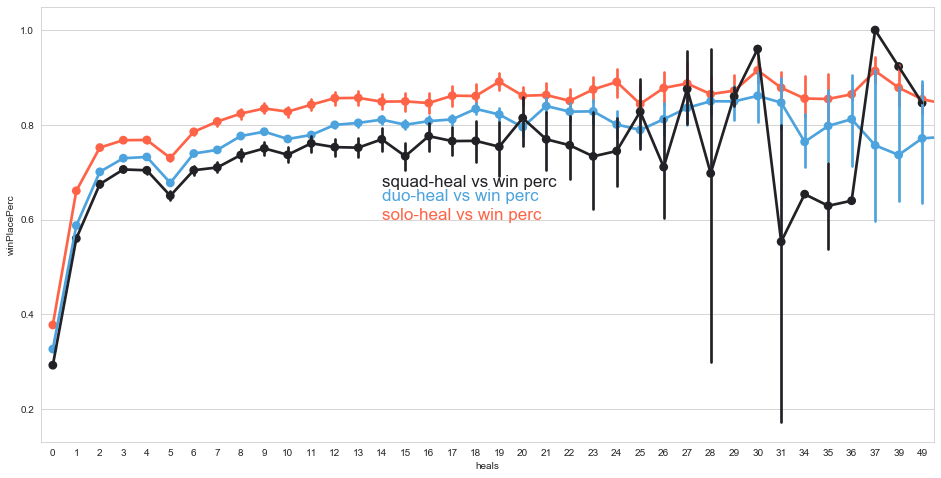

In [24]:
# heal vs win percentage
plt.subplots(figsize=(16, 8))
sns.pointplot(x=solo_game["heals"], y=solo_game["winPlacePerc"], color="#ff6347")
plt.text(14,0.6, 'solo-heal vs win perc',color='#ff6347',fontsize = 17)
sns.pointplot(x=duo_game["heals"], y=duo_game["winPlacePerc"], color="#4ca3dd")
plt.text(14,0.64, 'duo-heal vs win perc',color='#4ca3dd',fontsize = 17)
sns.pointplot(x=squad_game["heals"], y=squad_game["winPlacePerc"], color="#212126")
plt.text(14,0.67, 'squad-heal vs win perc',color='#212126',fontsize = 17)

Text(14, 0.53, 'squad-DBNOs vs winPlacePerc')

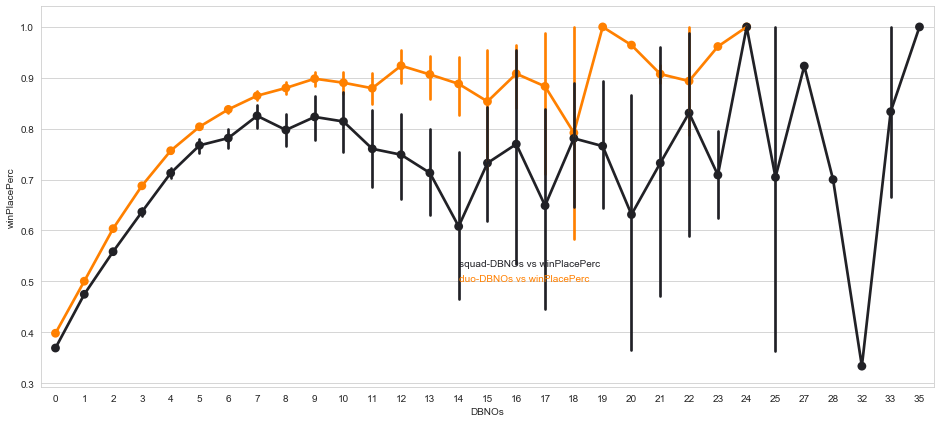

In [25]:
# Number of enemy players knocked vs win percentage
# N.B In solo match their is no chance to knock
plt.subplots(figsize=(16,7))
sns.pointplot(x=duo_game["DBNOs"], y=duo_game["winPlacePerc"], color="#ff8000")
plt.text(14,0.5, "duo-DBNOs vs winPlacePerc", color="#ff8000")
sns.pointplot(x=squad_game["DBNOs"], y=squad_game["winPlacePerc"], color="#212126")
plt.text(14,0.53, "squad-DBNOs vs winPlacePerc", color="#212126")

In [28]:
# Copy data
# Diffent Player has same Match ID
Data = train.copy()
Data["JoinServer"] = Data.groupby("matchId")["matchId"].transform("count")

In [30]:
# correlation
corr_matrix = train[3:].corr()
corr_matrix["winPlacePerc"].sort_values(ascending=False)

winPlacePerc       1.000000
walkDistance       0.810817
boosts             0.633483
weaponsAcquired    0.582504
damageDealt        0.438974
heals              0.427297
kills              0.418528
longestKill        0.408853
killStreaks        0.376841
rideDistance       0.343013
assists            0.297739
DBNOs              0.279323
headshotKills      0.276171
revives            0.240896
swimDistance       0.150328
vehicleDestroys    0.072409
numGroups          0.040686
maxPlace           0.038437
roadKills          0.034809
teamKills          0.015634
rankPoints         0.013494
killPoints         0.013091
winPoints          0.007292
Unnamed: 0        -0.000144
matchDuration     -0.005712
killPlace         -0.719051
Name: winPlacePerc, dtype: float64

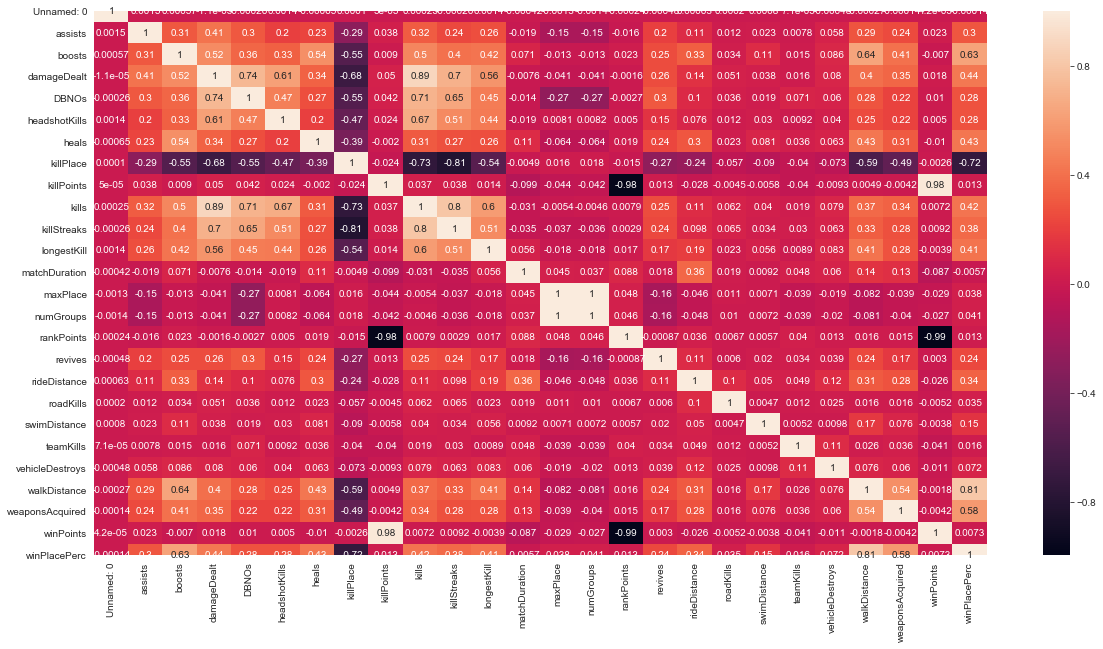

In [31]:
# heatmap
plt.subplots(figsize=(20,10))
sns.heatmap(corr_matrix,annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AE82309A48>,
      dtype=object)

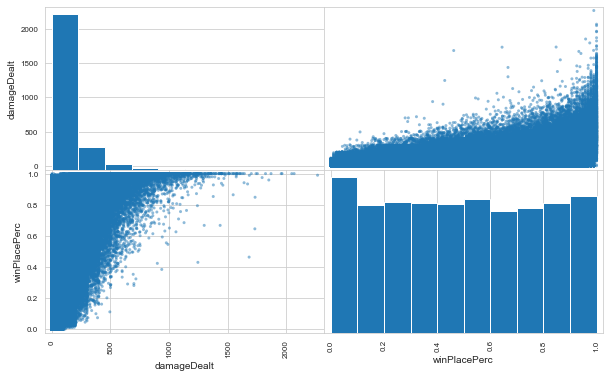

In [32]:
# scatter matrix
from pandas.plotting import scatter_matrix
a = ["damageDealt", "winPlacePerc"]
scatter_matrix(solo_game[a], figsize=(10,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AE83812648>,
      dtype=object)

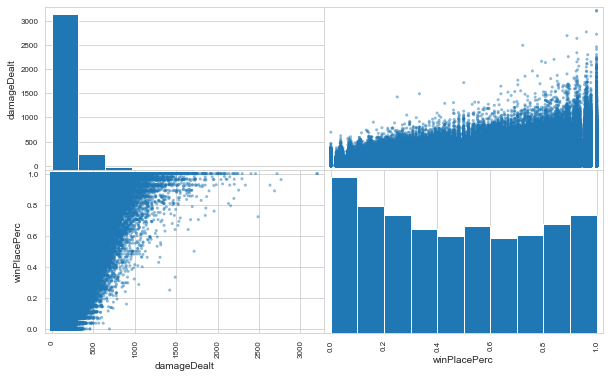

In [33]:
a = ["damageDealt", "winPlacePerc"]
scatter_matrix(duo_game[a], figsize=(10,6))

In [34]:
# add distance
train["TotalDistance"] = train["rideDistance"] + train["swimDistance"] + train["walkDistance"]

In [35]:
# create new DataFrame
new_data = train.groupby("Id")["TotalDistance", "heals", "winPlacePerc"].sum().sort_values(by="TotalDistance", ascending=False)
new = pd.DataFrame(new_data)[:40]

# First 40 who Traveled long distance

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

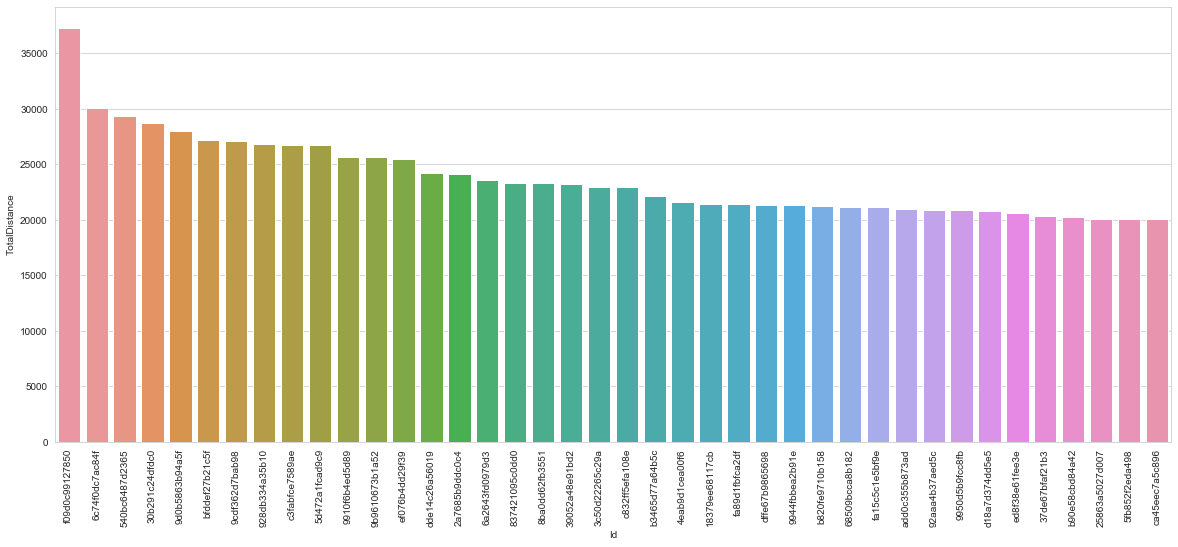

In [36]:
plt.subplots(figsize=(20,8))
fig = sns.barplot(x=new.index, y="TotalDistance", data=new)
plt.xticks(rotation=90)

matchId - ID to identify match. There are no matches that are in both the training and testing set.

# Take a random match id and analyze. Different player has same match id

In [37]:
# for solo match
solo_match_random = train[(train["matchType"]=="solo") & (train["matchId"]=="ce9bc89b3ca08c")].reset_index()
# for duo match
duo_match_random = train[(train["matchType"]=="duo") & (train["matchId"]=="110163d8bb94ae")].reset_index()
# for squad match
squad_match_random = train[(train["matchType"]=="squad") & (train["matchId"]=="df014fbee741c6")].reset_index()


,index,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,TotalDistance
0,97567,3919736,977e8babbf99a3,2ed8db3197175e,110163d8bb94ae,0,4,131.50,0,0,1,26,0,1,1,71.660,1318,duo,50,47,1487,0,0.0,0,0.0,0,0,2793.000,10,0,0.9796,2793.000
1,113874,4112961,40fd2f897d286c,2ed8db3197175e,110163d8bb94ae,0,2,182.40,0,1,0,13,0,2,1,86.640,1318,duo,50,47,1503,0,0.0,0,0.0,0,0,3377.000,11,0,0.9796,3377.000
2,132816,1207620,ced94db2ff09ec,a4e760e9f102da,110163d8bb94ae,0,0,51.48,0,0,0,82,0,0,0,0.000,1318,duo,50,47,1409,0,0.0,0,0.0,0,0,101.700,2,0,0.1020,101.700
3,181034,603643,fd0229bf73e986,a43d6891409844,110163d8bb94ae,0,5,480.00,3,2,1,2,0,6,2,170.200,1318,duo,50,47,1611,0,0.0,0,0.0,0,0,3200.000,5,0,0.8980,3200.000
4,220589,1890872,3d2f3934ff7043,0e6f9d1a2ef40e,110163d8bb94ae,0,0,100.00,1,0,0,32,0,1,1,45.560,1318,duo,50,47,1494,0,0.0,0,0.0,0,0,669.700,3,0,0.6327,669.700
5,277085,1909705,8457c3d53f5b25,ae95c0a5ee4969,110163d8bb94ae,0,0,33.26,0,0,0,68,0,0,0,0.000,1318,duo,50,47,1492,0,0.0,0,0.0,0,0,252.500,4,0,0.2449,252.500
6,331944,1233239,e0ed1da68e2570,f2894b0e339e64,110163d8bb94ae,2,9,633.60,3,1,9,4,0,4,1,67.090,1318,duo,50,47,1460,1,0.0,0,0.0,0,0,2824.000,4,0,1.0000,2824.000
7,357396,1654186,8a7439736a1382,5d30b8c476bf32,110163d8bb94ae,0,0,100.00,1,1,0,39,0,1,1,21.040,1318,duo,50,47,1471,1,0.0,0,0.0,0,0,139.600,2,0,0.3061,139.600
8,388719,2339409,b928ce12da66a4,0e6f9d1a2ef40e,110163d8bb94ae,0,0,0.00,0,0,0,53,0,0,0,0.000,1318,duo,50,47,1494,0,0.0,0,0.0,0,0,99.150,2,0,0.6327,99.150
9,416984,407883,5089efe69420c7,982ceb695ca2bf,110163d8bb94ae,0,1,0.00,0,0,2,50,0,0,0,0.000,1318,duo,50,47,1500,0,925.8,0,0.0,0,0,1520.000,4,0,0.7143,2445.800


In [38]:
duo_match_random

,index,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,TotalDistance
0,97567,3919736,977e8babbf99a3,2ed8db3197175e,110163d8bb94ae,0,4,131.50,0,0,1,26,0,1,1,71.660,1318,duo,50,47,1487,0,0.0,0,0.0,0,0,2793.000,10,0,0.9796,2793.000
1,113874,4112961,40fd2f897d286c,2ed8db3197175e,110163d8bb94ae,0,2,182.40,0,1,0,13,0,2,1,86.640,1318,duo,50,47,1503,0,0.0,0,0.0,0,0,3377.000,11,0,0.9796,3377.000
2,132816,1207620,ced94db2ff09ec,a4e760e9f102da,110163d8bb94ae,0,0,51.48,0,0,0,82,0,0,0,0.000,1318,duo,50,47,1409,0,0.0,0,0.0,0,0,101.700,2,0,0.1020,101.700
3,181034,603643,fd0229bf73e986,a43d6891409844,110163d8bb94ae,0,5,480.00,3,2,1,2,0,6,2,170.200,1318,duo,50,47,1611,0,0.0,0,0.0,0,0,3200.000,5,0,0.8980,3200.000
4,220589,1890872,3d2f3934ff7043,0e6f9d1a2ef40e,110163d8bb94ae,0,0,100.00,1,0,0,32,0,1,1,45.560,1318,duo,50,47,1494,0,0.0,0,0.0,0,0,669.700,3,0,0.6327,669.700
5,277085,1909705,8457c3d53f5b25,ae95c0a5ee4969,110163d8bb94ae,0,0,33.26,0,0,0,68,0,0,0,0.000,1318,duo,50,47,1492,0,0.0,0,0.0,0,0,252.500,4,0,0.2449,252.500
6,331944,1233239,e0ed1da68e2570,f2894b0e339e64,110163d8bb94ae,2,9,633.60,3,1,9,4,0,4,1,67.090,1318,duo,50,47,1460,1,0.0,0,0.0,0,0,2824.000,4,0,1.0000,2824.000
7,357396,1654186,8a7439736a1382,5d30b8c476bf32,110163d8bb94ae,0,0,100.00,1,1,0,39,0,1,1,21.040,1318,duo,50,47,1471,1,0.0,0,0.0,0,0,139.600,2,0,0.3061,139.600
8,388719,2339409,b928ce12da66a4,0e6f9d1a2ef40e,110163d8bb94ae,0,0,0.00,0,0,0,53,0,0,0,0.000,1318,duo,50,47,1494,0,0.0,0,0.0,0,0,99.150,2,0,0.6327,99.150
9,416984,407883,5089efe69420c7,982ceb695ca2bf,110163d8bb94ae,0,1,0.00,0,0,2,50,0,0,0,0.000,1318,duo,50,47,1500,0,925.8,0,0.0,0,0,1520.000,4,0,0.7143,2445.800


In [39]:
# some analysis
def analysis_random_match(matchType):
    matchType["DamagePercentage"] = matchType["damageDealt"] / 100
    matchType["DamagePercentage"].plot(kind="bar", figsize=(18,7))
    
    chickenDinner = matchType[matchType["winPlacePerc"]==1]
    a = chickenDinner["DamagePercentage"].to_string(index=False)
    print(f"Damage by those who got Chicken Dinner is {a} percent")
    
    high = matchType["DamagePercentage"].max()
    id_no = matchType[matchType["DamagePercentage"] == high]
    sno = id_no["Id"].to_string(index=False)
    kill_enemy = id_no["killPlace"].to_string(index=False)
    duration = id_no["matchDuration"]/60
    print(f"High Damage is {high} by ID no. is {sno}\nEnemy Player Killed {kill_enemy}\nMatch Duration {duration.to_string(index=False)}min")
    matchType["headshotKills"].plot(kind="bar", figsize=(18,7), color="#212126")
    b = matchType["matchType"][:1]
    plt.title(f"DamagePercentage and headshotKills in {b.to_string(index=False)} match")
    plt.xlabel("ID No.")
    plt.legend()

Damage by those who got Chicken Dinner is  6.336 percent
High Damage is 6.336 by ID no. is  e0ed1da68e2570
Enemy Player Killed  4
Match Duration  21.966667min


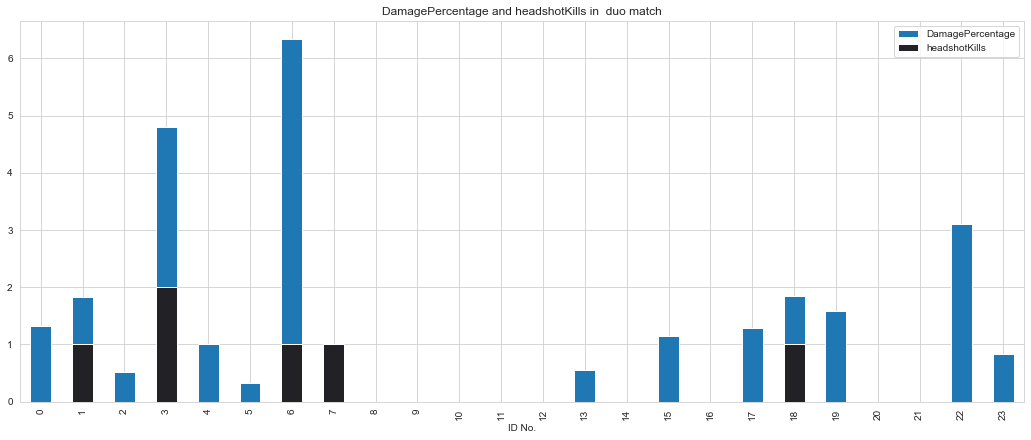

In [40]:
analysis_random_match(duo_match_random)

Damage by those who got Chicken Dinner is Series([], ) percent
High Damage is 7.504 by ID no. is  9f706cd80631eb
Enemy Player Killed  2
Match Duration  23.3min


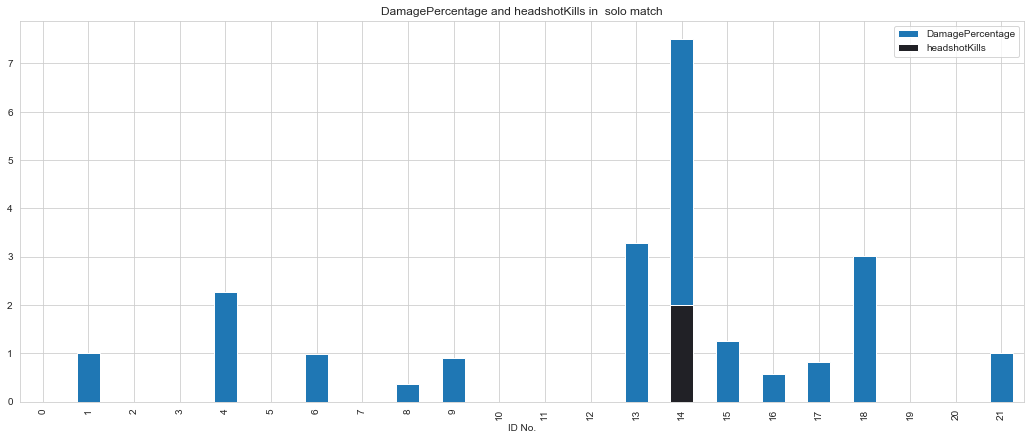

In [41]:
analysis_random_match(solo_match_random)

Damage by those who got Chicken Dinner is  2.7150
 0.2129 percent
High Damage is 9.639 by ID no. is  e415856afc20df
Enemy Player Killed  1
Match Duration  22.916667min


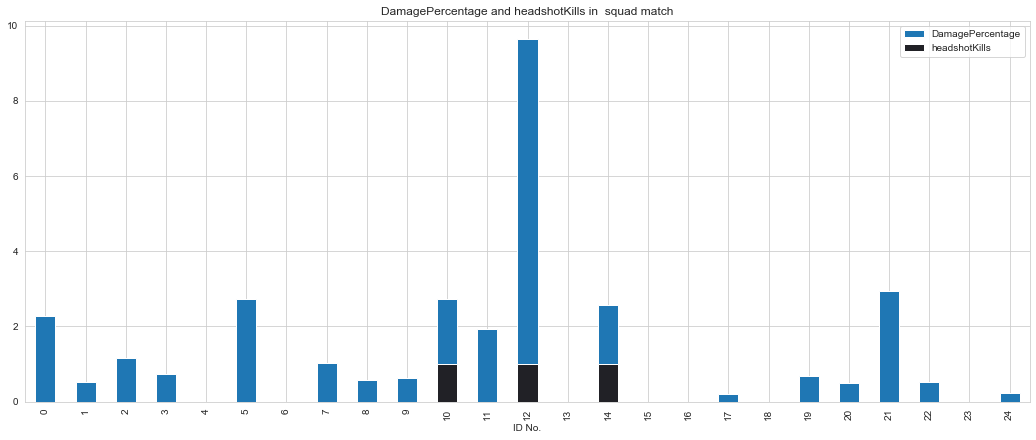

In [42]:
analysis_random_match(squad_match_random)

In [43]:
# count of revive vs knock
def reviveVsDBNOs(typeMatch):
    plt.subplots(figsize=(14,6))
    sns.countplot(x="DBNOs", hue="revives", data=typeMatch)

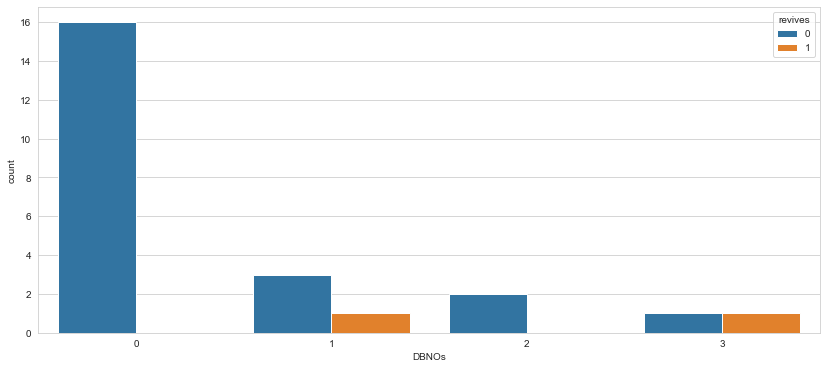

In [44]:
reviveVsDBNOs(duo_match_random)

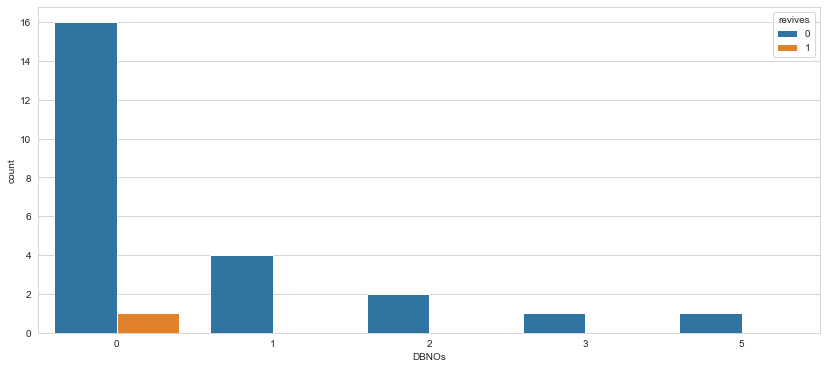

In [45]:
reviveVsDBNOs(squad_match_random)

# THANK YOU